# Deliverable 5

Press Shift-Enter to execute all code.

# Introduction

In this notebook we will fit a linear model to predict credit card balance based on 9 features. We will use coordinate descent to fit this linear model, via both a manual implementation and an implementation using existing libraries.

First we import the relevant libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Next we read our dataset into a Pandas dataframe:

In [2]:
data=pd.read_csv('Credit_N400_p9.csv')

First we numerically encode our binary feature columns "Gender", "Student", and "Married":

In [3]:
data['Gender']=data['Gender'].astype('category')
data['Student']=data['Student'].astype('category')
data['Married']=data['Married'].astype('category')

data['Gender']=data['Gender'].cat.codes
data['Student']=data['Student'].cat.codes
data['Married']=data['Married'].cat.codes

Next we separate out our features for training from our response (ground truth) vector:

In [4]:
X=data.drop(['Balance'], axis=1)
y=data['Balance']

Next we standardize our features and center our response vector with the following function:

In [5]:
def standardize(data):
    data['Income']-=np.mean(data['Income'])
    data['Income']/=np.std(data['Income'])

    data['Limit']-=np.mean(data['Limit'])
    data['Limit']/=np.std(data['Limit'])

    data['Rating']-=np.mean(data['Rating'])
    data['Rating']/=np.std(data['Rating'])

    data['Cards']-=np.mean(data['Cards'])
    data['Cards']/=np.std(data['Cards'])

    data['Age']-=np.mean(data['Age'])
    data['Age']/=np.std(data['Age'])

    data['Education']-=np.mean(data['Education'])
    data['Education']/=np.std(data['Education'])

    data['Gender']-=np.mean(data['Gender'])
    data['Gender']/=np.std(data['Gender'])

    data['Student']-=np.mean(data['Student'])
    data['Student']/=np.std(data['Student'])

    data['Married']-=np.mean(data['Married'])
    data['Married']/=np.std(data['Married'])
    
    return data

In [6]:
X=standardize(X)

In [7]:
y-=np.mean(y)

In [8]:
b=np.zeros(9)

X_2=X**2

b=X_2.sum(axis=0)
b

Income       400.0
Limit        400.0
Rating       400.0
Cards        400.0
Age          400.0
Education    400.0
Gender       400.0
Student      400.0
Married      400.0
dtype: float64

Next we define our coordinate descent function:

In [9]:
def coordinate_descent(X, y, lamb, alpha, iterations=1000):
    X_2=X**2
    b=np.zeros(9)
    
    b=X_2.sum(axis=0)
    
    beta=np.random.uniform(-1, 1, 9)
    
    X=np.array(X)
    
    for i in range(iterations):  
        for k in range(len(beta)):            
            Xbeta=np.dot(X, beta)        
            y_minus_Xbeta=np.subtract(y, Xbeta)
            y_minus_Xbeta_plus_Xbeta=np.add(y_minus_Xbeta, np.multiply(beta[k], X[:, k]))
            X_T=np.transpose(X[:, k])
            a_k=np.dot(X_T, y_minus_Xbeta_plus_Xbeta)
            
            params=(lamb*(1-alpha))/2
            abs_a_k=np.abs(a_k)
            abs_a_minus_params=np.subtract(abs_a_k, params)
            positive_a=max(0, abs_a_minus_params)            
            beta_numerator=np.multiply(np.sign(a_k), positive_a)

            lambalpha=lamb*alpha
            beta_denominator=np.add(b[k], lambalpha)
            
            beta_hat=np.divide(beta_numerator, beta_denominator)
            beta[k]=beta_hat
    return beta    

# Deliverable 1

Illustrate the effect of the tuning parameter on the inferred elastic net regression coefficients by generating six plots (one for each 𝛼 value) of nine lines (one for each of the 𝑝=9 features), with the 𝑦-axis as 𝛽̂
𝑗, 𝑗=1,2,…,9, and the 𝑥-axis the corresponding log-scaled tuning parameter value log10(𝜆) that generated the particular 𝛽̂
𝑗. Label both axes in all six plots. Without the log scaling of the tuning parameter 𝜆, the plots will look distorted.

In [10]:
lambdas=[10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4, 10**5, 10**6]
beta_list=[]

for lamb in lambdas:           
    beta=coordinate_descent(X, y, lamb, 0)
    beta_list.append(beta)    

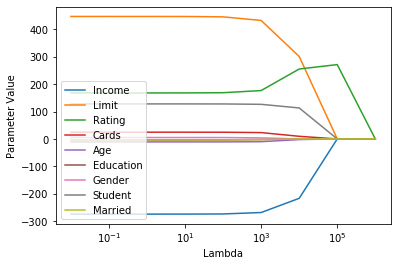

In [11]:
betas=pd.DataFrame(beta_list)
betas.index=lambdas
betas.columns=['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender', 'Student', 'Married']
betas.plot()
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Parameter Value')
plt.legend(loc='lower left')
plt.show()

In [12]:
lambdas=[10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4, 10**5, 10**6]
beta_list=[]

for lamb in lambdas:           
    beta=coordinate_descent(X, y, lamb, 0.2)
    beta_list.append(beta)    

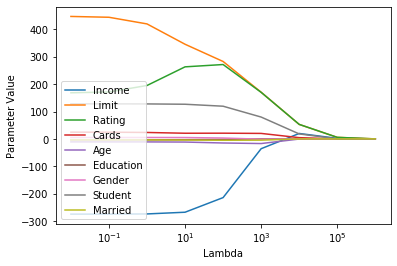

In [13]:
betas=pd.DataFrame(beta_list)
betas.index=lambdas
betas.columns=['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender', 'Student', 'Married']
betas.plot()
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Parameter Value')
plt.legend(loc='lower left')
plt.show()

In [14]:
lambdas=[10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4, 10**5, 10**6]
beta_list=[]

for lamb in lambdas:           
    beta=coordinate_descent(X, y, lamb, 0.4)
    beta_list.append(beta)    

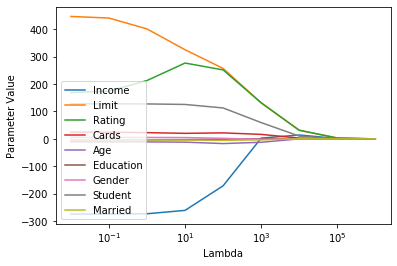

In [15]:
betas=pd.DataFrame(beta_list)
betas.index=lambdas
betas.columns=['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender', 'Student', 'Married']
betas.plot()
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Parameter Value')
plt.legend(loc='lower left')
plt.show()

In [16]:
lambdas=[10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4, 10**5, 10**6]
beta_list=[]

for lamb in lambdas:           
    beta=coordinate_descent(X, y, lamb, 0.6)
    beta_list.append(beta)    

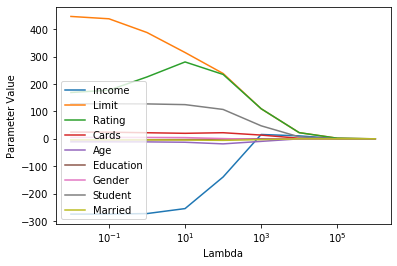

In [17]:
betas=pd.DataFrame(beta_list)
betas.index=lambdas
betas.columns=['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender', 'Student', 'Married']
betas.plot()
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Parameter Value')
plt.legend(loc='lower left')
plt.show()

In [18]:
lambdas=[10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4, 10**5, 10**6]
beta_list=[]

for lamb in lambdas:           
    beta=coordinate_descent(X, y, lamb, 0.8)
    beta_list.append(beta)    

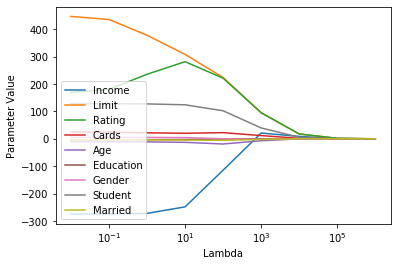

In [19]:
betas=pd.DataFrame(beta_list)
betas.index=lambdas
betas.columns=['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender', 'Student', 'Married']
betas.plot()
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Parameter Value')
plt.legend(loc='lower left')
plt.show()

In [20]:
lambdas=[10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4, 10**5, 10**6]
beta_list=[]

for lamb in lambdas:           
    beta=coordinate_descent(X, y, lamb, 1)
    beta_list.append(beta)    

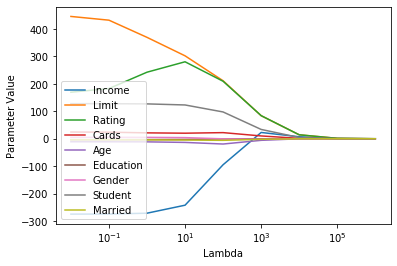

In [21]:
betas=pd.DataFrame(beta_list)
betas.index=lambdas
betas.columns=['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender', 'Student', 'Married']
betas.plot()
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Parameter Value')
plt.legend(loc='lower left')
plt.show()

# Deliverable 2

Illustrate the effect of the tuning parameters on the cross validation error by generating a plot of six lines (one for each 𝛼 value) with the 𝑦-axis as CV(5) error, and the 𝑥-axis the corresponding log-scaled tuning parameter value log10(𝜆) that generated the particular CV(5) error. Label both axes in all six plots. Without the log scaling of the tuning parameter 𝜆, the plots will look distorted.

In [22]:
data=pd.read_csv('Credit_N400_p9.csv')

In [23]:
data['Gender']=data['Gender'].astype('category')
data['Student']=data['Student'].astype('category')
data['Married']=data['Married'].astype('category')

data['Gender']=data['Gender'].cat.codes
data['Student']=data['Student'].cat.codes
data['Married']=data['Married'].cat.codes

In [24]:
data = data.sample(frac=1).reset_index(drop=True)

In [25]:
X=data.drop(['Balance'], axis=1)
y=data['Balance']

In [26]:
def standardize_validation(train, val):
    val['Income']-=np.mean(train['Income'])
    val['Income']/=np.std(train['Income'])

    val['Limit']-=np.mean(train['Limit'])
    val['Limit']/=np.std(train['Limit'])

    val['Rating']-=np.mean(train['Rating'])
    val['Rating']/=np.std(train['Rating'])

    val['Cards']-=np.mean(train['Cards'])
    val['Cards']/=np.std(train['Cards'])

    val['Age']-=np.mean(train['Age'])
    val['Age']/=np.std(train['Age'])

    val['Education']-=np.mean(train['Education'])
    val['Education']/=np.std(train['Education'])

    val['Gender']-=np.mean(train['Gender'])
    val['Gender']/=np.std(train['Gender'])

    val['Student']-=np.mean(train['Student'])
    val['Student']/=np.std(train['Student'])

    val['Married']-=np.mean(train['Married'])
    val['Married']/=np.std(train['Married'])
    
    return val

In [27]:
def cross_validation_split(X, y, fold_no):    
    drop_train=np.arange(80*fold_no, 80*(fold_no+1))
    X_train=X.drop(axis=0, index=drop_train)
    y_train=y.drop(axis=0, index=drop_train)
    X_val=X.iloc[80*fold_no:80*(fold_no+1)]
    y_val=y.iloc[80*fold_no:80*(fold_no+1)]    
        
    X_val=standardize_validation(X_train, X_val)    
    y_val -= np.mean(y_train)
    
    X_train=standardize(X_train)
    y_train -= np.mean(y_train)    
        
    return X_train, y_train, X_val, y_val

In [28]:
def predict(val, beta):
    predictions=np.dot(val, beta)
    return predictions

In [29]:
def compute_MSE(y_true, y_pred):
    error=(np.sum((y_true-y_pred)**2))/len(y_true)    
    return error

In [30]:
alphas=[0, 0.2, 0.4, 0.6, 0.8, 1]
error_list=[]

for i in range(5):    
    X=data.drop(['Balance'], axis=1)
    y=data['Balance']
    X_train, y_train, X_val, y_val=cross_validation_split(X, y, i)    
    for alpha in alphas:
        for lamb in lambdas:
            beta=coordinate_descent(X_train, y_train, lamb, alpha)        
            predictions=predict(X_val, beta)
            error=compute_MSE(y_val, predictions)        
            error_list.append(error)

C:\Users\mkell\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\mkell\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mkell\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

C:\Users\mkell\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\mkell\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mkell\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

C:\Users\mkell\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\mkell\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mkell\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [31]:
error_average_list=[]

for i in range(54):
    error_average_list.append((error_list[i]+error_list[i+54]+error_list[i+108]+error_list[i+162]+error_list[i+216])/5)

In [32]:
alpha_0_error=error_average_list[0:9]
alpha_0_2_error=error_average_list[9:18]
alpha_0_4_error=error_average_list[18:27]
alpha_0_6_error=error_average_list[27:36]
alpha_0_8_error=error_average_list[36:45]
alpha_1_error=error_average_list[45:54]

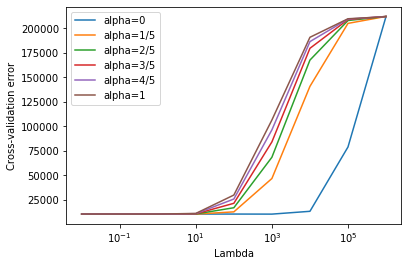

In [33]:
plt.plot(lambdas, alpha_0_error, label='alpha=0')
plt.plot(lambdas, alpha_0_2_error, label='alpha=1/5')
plt.plot(lambdas, alpha_0_4_error, label='alpha=2/5')
plt.plot(lambdas, alpha_0_6_error, label='alpha=3/5')
plt.plot(lambdas, alpha_0_8_error, label='alpha=4/5')
plt.plot(lambdas, alpha_1_error, label='alpha=1')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Cross-validation error')
plt.legend()
plt.show()

# Deliverable 3

Indicate the pair of values 𝜆 and 𝛼 that generated the smallest CV(5) error.

In [39]:
print(np.argmin(error_average_list))
print(alphas[0], lambdas[5], np.min(error_average_list))

5
0 1000 10213.321412684169


From this, it is clear that a lambda value of 1000 an alpha value of 0 produces the lowest error.

# Deliverable 4

Given the optimal 𝜆 and 𝛼 pair, retrain your model on the entire dataset of 𝑁=400 observations and provide the estimates of the 𝑝=9 best-fit model parameters. How do these estimates compare to the estimates obtained from ridge regression (𝛼=1 under optimal 𝜆 for 𝛼=1) and lasso (𝛼=0 under optimal 𝜆 for 𝛼 =0) on the entire dataset of 𝑁=400 observations?

In [40]:
beta=coordinate_descent(X, y, 1000, 0)
beta

array([-3.23270915e+00,  2.70935664e-01, -1.08864873e+00,  2.06674305e+01,
       -3.21638920e+00, -1.11530725e+01, -2.46151096e+01,  3.85784678e+02,
       -1.94889522e+01])

In [41]:
beta=coordinate_descent(X, y, 1000, 1)
beta

array([-3.20669929,  0.21551386, -0.26963855,  6.23711311, -3.44713846,
       -7.8234624 , -3.84207631, 13.77542144, -4.10944277])

The lowest error is produced under lasso regression with a lambda value of 1000. They are roughly similar, with less weight being placed on the 'Cards' feature and the 'Education' feature in ridge regression and much more weight on the 'Student' feature in lasso regression.

# Deliverable 6

Implement the assignment using statistical or machine learning libraries in a language of your choice. Compare the results with those obtained above, and provide a discussion as to why you believe your results are different if you found them to be different.

In [42]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.linear_model import ElasticNet

## Standardization

In [43]:
data=pd.read_csv('Credit_N400_p9.csv')

In [44]:
data['Gender']=data['Gender'].astype('category')
data['Student']=data['Student'].astype('category')
data['Married']=data['Married'].astype('category')

data['Gender']=data['Gender'].cat.codes
data['Student']=data['Student'].cat.codes
data['Married']=data['Married'].cat.codes

In [45]:
X=data.drop(['Balance'], axis=1)
y=data['Balance']

In [46]:
standardize=StandardScaler()
y_center=StandardScaler(with_std=False)

In [47]:
X=standardize.fit_transform(X)
X=pd.DataFrame(X)

In [48]:
X.columns=['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender', 'Student', 'Married']

In [49]:
y-=np.mean(y)

## Deliverable 1

Illustrate the effect of the tuning parameter on the inferred elastic net regression coefficients by generating six plots (one for each 𝛼 value) of nine lines (one for each of the 𝑝=9 features), with the 𝑦-axis as 𝛽̂
𝑗, 𝑗=1,2,…,9, and the 𝑥-axis the corresponding log-scaled tuning parameter value log10(𝜆) that generated the particular 𝛽̂
𝑗. Label both axes in all six plots. Without the log scaling of the tuning parameter 𝜆, the plots will look distorted.

In [50]:
lambdas=[10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4, 10**5, 10**6]
beta_list=[]

for lamb in lambdas:
    elastic_net=ElasticNet(alpha=lamb, l1_ratio=0, max_iter=1000)
    elastic_net.fit(X, y)
    beta_list.append(elastic_net.coef_)

C:\Users\mkell\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2461066.1748745255, tolerance: 8433.991191000001
  positive)
C:\Users\mkell\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6294823.140035424, tolerance: 8433.991191000001
  positive)
C:\Users\mkell\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19604939.04394903, tolerance: 8433.991191000001
  positive)
C:\Users\mkell\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

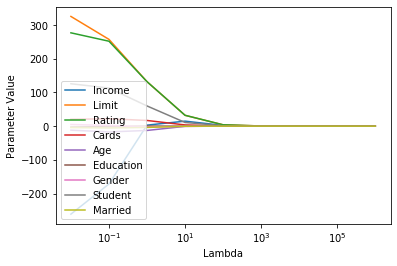

In [51]:
betas=pd.DataFrame(beta_list)
betas.index=lambdas
betas.columns=['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender', 'Student', 'Married']
betas.plot()
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Parameter Value')
plt.legend(loc='lower left')
plt.show()

In [52]:
lambdas=[10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4, 10**5, 10**6]
beta_list=[]

for lamb in lambdas:
    elastic_net=ElasticNet(alpha=lamb, l1_ratio=0.2, max_iter=1000)
    elastic_net.fit(X, y)
    beta_list.append(elastic_net.coef_)

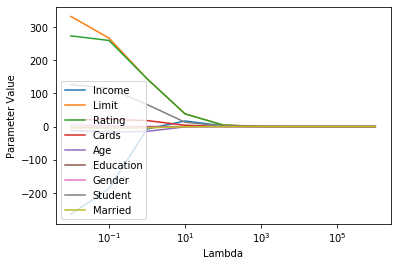

In [53]:
betas=pd.DataFrame(beta_list)
betas.index=lambdas
betas.columns=['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender', 'Student', 'Married']
betas.plot()
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Parameter Value')
plt.legend(loc='lower left')
plt.show()

In [54]:
lambdas=[10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4, 10**5, 10**6]
beta_list=[]

for lamb in lambdas:
    elastic_net=ElasticNet(alpha=lamb, l1_ratio=0.4, max_iter=1000)
    elastic_net.fit(X, y)
    beta_list.append(elastic_net.coef_)

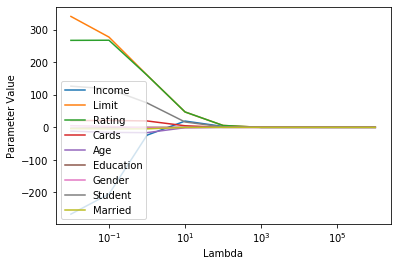

In [55]:
betas=pd.DataFrame(beta_list)
betas.index=lambdas
betas.columns=['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender', 'Student', 'Married']
betas.plot()
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Parameter Value')
plt.legend(loc='lower left')
plt.show()

In [56]:
lambdas=[10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4, 10**5, 10**6]
beta_list=[]

for lamb in lambdas:
    elastic_net=ElasticNet(alpha=lamb, l1_ratio=0.6, max_iter=1000)
    elastic_net.fit(X, y)
    beta_list.append(elastic_net.coef_)

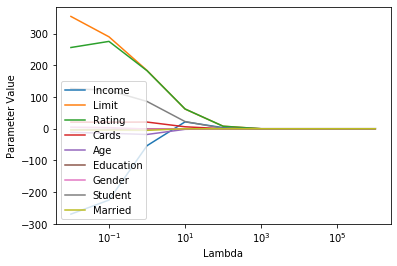

In [57]:
betas=pd.DataFrame(beta_list)
betas.index=lambdas
betas.columns=['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender', 'Student', 'Married']
betas.plot()
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Parameter Value')
plt.legend(loc='lower left')
plt.show()

In [58]:
lambdas=[10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4, 10**5, 10**6]
beta_list=[]

for lamb in lambdas:
    elastic_net=ElasticNet(alpha=lamb, l1_ratio=0.8, max_iter=1000)
    elastic_net.fit(X, y)
    beta_list.append(elastic_net.coef_)

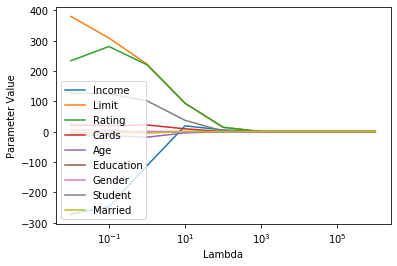

In [59]:
betas=pd.DataFrame(beta_list)
betas.index=lambdas
betas.columns=['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender', 'Student', 'Married']
betas.plot()
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Parameter Value')
plt.legend(loc='lower left')
plt.show()

In [60]:
lambdas=[10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4, 10**5, 10**6]
beta_list=[]

for lamb in lambdas:
    elastic_net=ElasticNet(alpha=lamb, l1_ratio=1, max_iter=1000)
    elastic_net.fit(X, y)
    beta_list.append(elastic_net.coef_)

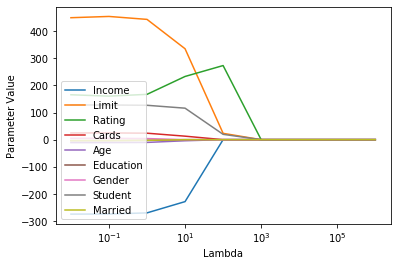

In [61]:
betas=pd.DataFrame(beta_list)
betas.index=lambdas
betas.columns=['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender', 'Student', 'Married']
betas.plot()
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Parameter Value')
plt.legend(loc='lower left')
plt.show()

## Deliverable 2 

Illustrate the effect of the tuning parameters on the cross validation error by generating a plot of six lines (one for each 𝛼 value) with the 𝑦-axis as CV(5) error, and the 𝑥-axis the corresponding log-scaled tuning parameter value log10(𝜆) that generated the particular CV(5) error. Label both axes in all six plots. Without the log scaling of the tuning parameter 𝜆, the plots will look distorted.

In [78]:
from sklearn.model_selection import GridSearchCV

elastic_net=ElasticNet(max_iter=1000)
parameters={'l1_ratio':[0, 0.2, 0.4, 0.6, 0.8, 1],'alpha': [1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6]}, 
mse=make_scorer(mean_squared_error, greater_is_better=False)
elastic_regressor=GridSearchCV(elastic_net, parameters, scoring=mse, cv=5, refit=False)
elastic_regressor.fit(X, y)

C:\Users\mkell\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2030194.835116839, tolerance: 6884.9098
  positive)
C:\Users\mkell\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1833267.1140612601, tolerance: 6426.883149687501
  positive)
C:\Users\mkell\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2051958.9428390542, tolerance: 6658.970875
  positive)
C:\Users\mkell\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1907165.

GridSearchCV(cv=5, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=({'alpha': [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0,
                                    10000.0, 100000.0, 1000000.0],
                          'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1]},),
             pre_dispatch='2*n_jobs', refit=False, return_train_score=False,
             scoring=make_scorer(mean_squared_error, greater_is_better=False),
             verbose=0)

In [79]:
alpha_0_error=[]
alpha_0_2_error=[]
alpha_0_4_error=[]
alpha_0_6_error=[]
alpha_0_8_error=[]
alpha_1_error=[]

for i in range(9):    
    alpha_0_error.append(np.absolute(elastic_regressor.cv_results_['mean_test_score'][6*i]))
    alpha_0_2_error.append(np.absolute(elastic_regressor.cv_results_['mean_test_score'][(6*i)+1]))
    alpha_0_4_error.append(np.absolute(elastic_regressor.cv_results_['mean_test_score'][(6*i)+2]))
    alpha_0_6_error.append(np.absolute(elastic_regressor.cv_results_['mean_test_score'][(6*i)+3]))
    alpha_0_8_error.append(np.absolute(elastic_regressor.cv_results_['mean_test_score'][(6*i)+4]))
    alpha_1_error.append(np.absolute(elastic_regressor.cv_results_['mean_test_score'][(6*i)+5]))

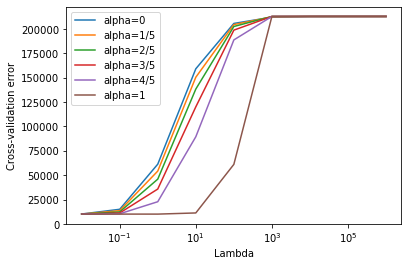

In [80]:
plt.plot(lambdas, alpha_0_error, label='alpha=0')
plt.plot(lambdas, alpha_0_2_error, label='alpha=1/5')
plt.plot(lambdas, alpha_0_4_error, label='alpha=2/5')
plt.plot(lambdas, alpha_0_6_error, label='alpha=3/5')
plt.plot(lambdas, alpha_0_8_error, label='alpha=4/5')
plt.plot(lambdas, alpha_1_error, label='alpha=1')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Cross-validation error')
plt.legend()
plt.show()

## Deliverable 3 

Indicate the pair of values 𝜆 and 𝛼 that generated the smallest CV(5) error.

In [81]:
print(np.argmin(elastic_regressor.cv_results_['mean_test_score']))
print(alphas[3], lambdas[5], np.min(np.absolute(elastic_regressor.cv_results_['mean_test_score'])))

33
0.6 1000 10073.023177511897


We can see from this plot that a lambda of 1000 and an alpha of 0.6 produced the lowest cross-validation error.

## Deliverable 4 

Given the optimal 𝜆 and 𝛼 pair, retrain your model on the entire dataset of 𝑁=400 observations and provide the estimates of the 𝑝=9 best-fit model parameters. How do these estimates compare to the estimates obtained from ridge regression (𝛼=1 under optimal 𝜆 for 𝛼=1) and lasso (𝛼=0 under optimal 𝜆 for 𝛼 =0) on the entire dataset of 𝑁=400 observations?

In [86]:
elastic_net=ElasticNet(alpha=10e3, l1_ratio=0.6, max_iter=1000)
elastic_net.fit(X, y)
elastic_net.coef_

array([ 0.,  0.,  0.,  0.,  0., -0., -0.,  0., -0.])

In [83]:
elastic_net=ElasticNet(alpha=10e-2, l1_ratio=1, max_iter=1000)
elastic_net.fit(X, y)
elastic_net.coef_

array([-274.19276694,  454.44301883,  160.54326256,   24.88216753,
        -10.84910773,   -3.42921675,    5.08738724,  127.88178575,
         -3.26535407])

In [84]:
elastic_net=ElasticNet(alpha=10e-2, l1_ratio=0, max_iter=1000)
elastic_net.fit(X, y)
elastic_net.coef_

C:\Users\mkell\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6294823.140035424, tolerance: 8433.991191000001
  positive)


array([-171.5995841 ,  257.25742574,  251.75259153,   21.86720605,
        -17.22886784,   -1.37446788,    2.02238825,  112.91876206,
         -5.47092097])

From these results, it appears that the lasso results are the best for this dataset, since the optimal lambda and alpha parameters are the same. It is therefore reasonable to assume that the ridge parameters will produce a higher error.

# Discussion

There are a few notable differences between the manual implementation and the scikit-learn implementation. First, for Deliverable 1, the graphs are roughly similar in shape, but there are much different feature values. This could be due to the different ways in which scikit-learn performs ridge regression.

I note here that in scikit-learn's built-in elastic net regression function, the parameter 'alpha' corresponds to lambda in our implementation. Also, the parameter 'l1_ratio' corresponds to alpha in our implementation.

Also, the scikit implementation returned a different ideal parameter pair from the manual implementation. This is possibly due to the fact that given our large error values, scikit-learn may consider the differences in error when moving to smaller lambdas to be negligible enough that it chooses a simpler model with a higher lambda and higher alpha as the best tuning parameter. We note that for most lambdas in lasso regression, there are neglibile differences in error.